In [1]:
import time
import sklearn.linear_model
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

/Users/zivlazarov/miniforge3/envs/tensorflow-env/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
X.iloc[0, -3:-1]

pixel782    0.0
pixel783    0.0
Name: 0, dtype: float64

In [6]:
# setting pixel values to be in [0, 1] range
# X = X/255.0

In [7]:
columns = list(X.columns)

In [8]:
new_columns = ['bias']

In [9]:
# new list for the dataframe's columns
new_columns.extend(columns)

In [10]:
# creating the bias column
X['bias'] = 1

In [11]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,bias
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [12]:
# reordering the dataframe with the first column to be the bias
X = X[new_columns]

In [13]:
X.head()

,bias,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# getting the correct shape
X.shape

(70000, 785)

In [15]:
y.shape

(70000,)

In [16]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [17]:
# working with integers instead of strings for convenience
y = y.apply(lambda x : int(x))

In [18]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [19]:
import matplotlib.pyplot as plt

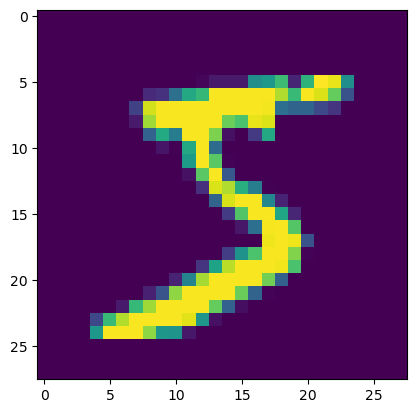

In [342]:
# getting an idea of an image
plt.imshow(X.to_numpy()[0, 1:].reshape(28, 28))

(array([6903., 7877., 6990., 7141., 6824., 6313., 6876., 7293., 6825.,
        6958.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

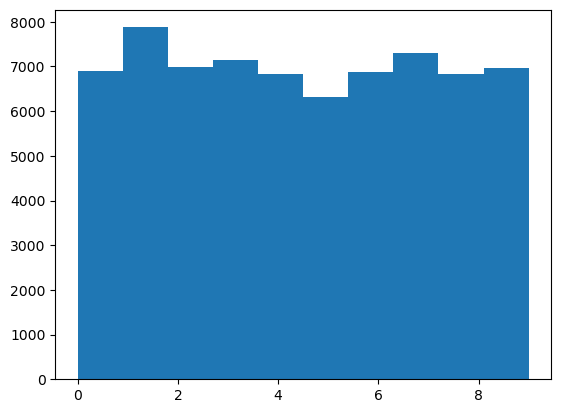

In [27]:
# check distribution of each digit
plt.hist(y)

(array([[10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 7.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.],
        [ 7.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.],
        [ 6.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.],
        [ 6.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 8.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [ 6.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.],
        [ 6.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  2.],
        [ 6.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  3.],
        [ 6.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  2.],
        [ 6.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  2.],
        [ 5.,  1.,  0.,  0.,  0.,  0.,  

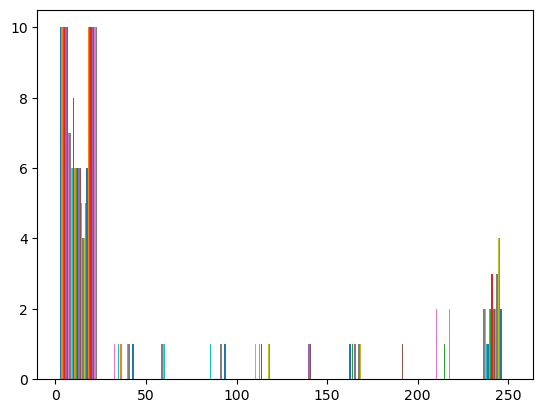

In [343]:
plt.hist(X_train[np.where(y_train == 2)][0, 1:].reshape(28, 28)[10:20, :])

(array([[10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 9.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 9.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 8.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 8.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 8.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 8.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 8.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 8.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
        [ 8.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
        [ 8.,  0.,  0.,  0.,  0.,  0.,  

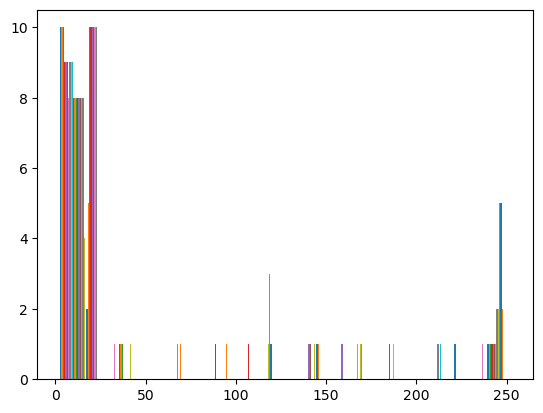

In [344]:
plt.hist(X_train[np.where(y_train == 7)][0, 1:].reshape(28, 28)[10:20, :])

In [345]:
import numpy as np


class Perceptron:

    def __init__(self, num_features, classes, epochs=1):
        # num_features here includes the extra bias column with the dataset
        self.classes = classes
        self.num_classes = len(self.classes)
        self.num_features = num_features
        self.num_samples = 0
        self.epochs = epochs
        
        # initializing the weights vector for every class with values [-1, 1]
        self.weights = np.random.uniform(low=-1, high=1, size=(self.num_classes, self.num_features))
#         self.weights = np.random.rand(self.num_classes, self.num_features)
#         self.weights = np.zeros(shape=(self.num_classes, self.num_features))
        self.final_weights = self.weights
        # determined by the size of samples
        self.labels = None
                  
    def init_multi_class_labels(self, y_train):
        self.num_samples = X_train.shape[0]
        # initializing the perceptron training labels
        self.labels = np.zeros(shape=(self.num_classes, self.num_samples))
        # setting labels' values based on every class in the training data
        for class_idx in range(self.num_classes):
            self.labels[class_idx][y_train == class_idx] = 1
            self.labels[class_idx][y_train != class_idx] = -1

    def fit(self, X_train, y_train):
        self.init_multi_class_labels(y_train)
        # defining error value for each class for pocket algorithm
        min_errors = np.full(shape=(self.num_classes,), fill_value=np.inf)
        
        # traversing the dataset
        for epoch in range(self.epochs):
            for t in range(self.num_samples):
                # using the np.sign method because probability of dot product to be 0 is very low
                y_preds = np.sign(self.weights(X_train[t]))
                
                # getting all classes that were misclassified
                misclassified_classes_indexes = np.where(y_preds != self.labels[:, t])

                # updating weights vectors for every misclassified label
                self.weights[misclassified_classes_indexes] += \
                y_preds[misclassified_classes_indexes][:, np.newaxis] * X_train[t, :]
                
                # calculating their errors
                errors_t = np.sum(
                    np.sign(self.weights.dot(X_train.T)) != self.labels
                , axis=1) / self.num_samples
                
                # pocketing the improved weight vectors
                to_improve_classes_indexes = np.where(errors_t < min_errors)
                self.final_weights[to_improve_classes_indexes, :] = self.weights[to_improve_classes_indexes, :]
                min_errors[to_improve_classes_indexes] = errors_t[to_improve_classes_indexes]
    
            
        print(min_errors)
                        
    def predict(self, X):
        # argmax returns the digits
        return np.argmax(self.weights.dot(X))
        

    def error(self, weights, X, y):
        return np.sum(np.sign(weights.dot(X.T)) != y) / self.num_samples


def sign(value):
    return 1 if value >= 0 else -1

In [346]:
def perceptron(X_train, y_train, digit):
    num_samples = X_train.shape[0]
    num_features = X_train.shape[1]
    
    weights = np.random.rand(num_features)
    best_weights = weights
    labels = np.zeros(shape=(num_samples, ))
    labels[y_train == digit] = 1
    labels[y_train != digit] = -1
    min_error = np.inf
    
    for i in range(num_samples):
        y_pred = sign(weights.dot(X_train[i]))
        if y_pred != labels[i]:
            weights += y_pred * X_train[i]
        error = np.sum(np.sign(weights.dot(X_train.T)) != labels) / num_samples
        if error < min_error:
            best_weights = weights
            min_error = error
    return best_weights

In [347]:
from sklearn.model_selection import train_test_split
num_train_samples = 10000

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=num_train_samples/len(X), shuffle=True)
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

In [349]:
X_train.shape

(10000, 785)

In [315]:
model = Perceptron(num_features=X_train.shape[1], classes=y.unique(), epochs=1)

In [316]:
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

[0.897  0.1698 0.9017 0.7838 0.902  0.9057 0.9008 0.8969 0.096  0.907 ]


In [317]:
end_time - start_time

66.0732810497284

In [318]:
num_test_samples = len(y_test)
predictions = np.zeros(shape=(num_test_samples,))
for i in range(num_test_samples):
    predictions[i] = model.predict(X_test[i])
np.sum(predictions == y_test) / num_test_samples

0.0023333333333333335

In [ ]:
weights = np.zeros(shape=(y.nunique(), X.shape[1]))
for i in range(y.nunique()):
    weights[i] = perceptron(X_train, y_train, i)

num_test_samples = len(y_test)
predictions = np.zeros(shape=(num_test_samples,))
for i in range(num_test_samples):
    predictions[i] = np.argmax(weights.dot(X_test[i]))
np.sum(predictions == y_test) / num_test_samples

In [ ]:
with open('model_weights.npy', 'wb') as f:
    np.save(f, model.final_weights)